In [2]:
# Dependencies
import requests
import json
import pandas as pd
import time
import pprint
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem


In [3]:
bitcoin_comment_times = pd.read_csv('output/comments_bitcoin.csv', index_col = 0)
ethereum_comment_times = pd.read_csv('output/comments_ethereum.csv', index_col= 0)
cardano_comment_times = pd.read_csv('output/comments_cardano.csv', index_col= 0)
dogecoin_comment_times = pd.read_csv('output/comments_dogecoin.csv', index_col= 0)
nasdaq_comment_times = pd.read_csv('output/comments_nasdaq.csv', index_col= 0)
dow_comment_times = pd.read_csv('output/comments_dow.csv', index_col= 0)

C:\Users\12164\anaconda3\envs\PythonData\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
bitcoin_comment_times['Exchange']= 'Bitcoin'
ethereum_comment_times['Exchange']= 'Ethereum'
cardano_comment_times['Exchange']= 'Cardano'
dogecoin_comment_times['Exchange']= 'Dogecoin'
nasdaq_comment_times['Exchange']= 'NASDAQ'
dow_comment_times['Exchange']= 'Dow Jones'

bitcoin_comment_times.head()

,Timestamp,SubReddit,Exchange
0,1527825606,ethereum,Bitcoin
1,1527825642,btc,Bitcoin
2,1527825648,btc,Bitcoin
3,1527825725,btc,Bitcoin
4,1527825939,Sexsells,Bitcoin


In [5]:
reddit_comments = pd.concat([bitcoin_comment_times, ethereum_comment_times, cardano_comment_times, dogecoin_comment_times, nasdaq_comment_times, dow_comment_times], ignore_index= True, keys = ('Bitcoin', 'Ethereum', 'Cardano', 'Dogecoin', 'NASDAQ', 'Dow Jones'))

In [6]:
reddit_comments.dtypes

Timestamp     int64
SubReddit    object
Exchange     object
dtype: object

In [7]:
reddit_comments['DateTime']= [datetime.fromtimestamp(i) for i in reddit_comments['Timestamp']]
reddit_comments

,Timestamp,SubReddit,Exchange,DateTime
0,1527825606,ethereum,Bitcoin,2018-06-01 00:00:06
1,1527825642,btc,Bitcoin,2018-06-01 00:00:42
2,1527825648,btc,Bitcoin,2018-06-01 00:00:48
3,1527825725,btc,Bitcoin,2018-06-01 00:02:05
4,1527825939,Sexsells,Bitcoin,2018-06-01 00:05:39
...,...,...,...,...
1955499,1593573680,Syracuse_comments,Dow Jones,2020-06-30 23:21:20
1955500,1593574736,40kOrkScience,Dow Jones,2020-06-30 23:38:56
1955501,1593575142,confessions,Dow Jones,2020-06-30 23:45:42
1955502,1593575271,wallstreetbets,Dow Jones,2020-06-30 23:47:51


In [8]:
reddit_comments['Date'] = reddit_comments['DateTime'].dt.date
reddit_comments.head()

,Timestamp,SubReddit,Exchange,DateTime,Date
0,1527825606,ethereum,Bitcoin,2018-06-01 00:00:06,2018-06-01
1,1527825642,btc,Bitcoin,2018-06-01 00:00:42,2018-06-01
2,1527825648,btc,Bitcoin,2018-06-01 00:00:48,2018-06-01
3,1527825725,btc,Bitcoin,2018-06-01 00:02:05,2018-06-01
4,1527825939,Sexsells,Bitcoin,2018-06-01 00:05:39,2018-06-01


In [9]:
reddit_comments_clean = reddit_comments[['Date', 'SubReddit', 'Exchange']]
reddit_comments_clean

,Date,SubReddit,Exchange
0,2018-06-01,ethereum,Bitcoin
1,2018-06-01,btc,Bitcoin
2,2018-06-01,btc,Bitcoin
3,2018-06-01,btc,Bitcoin
4,2018-06-01,Sexsells,Bitcoin
...,...,...,...
1955499,2020-06-30,Syracuse_comments,Dow Jones
1955500,2020-06-30,40kOrkScience,Dow Jones
1955501,2020-06-30,confessions,Dow Jones
1955502,2020-06-30,wallstreetbets,Dow Jones


In [10]:
reddit_grouped = reddit_comments_clean.groupby(['Exchange', 'Date'])
reddit_grouped.count()

SubReddit
Exchange Date                 
Bitcoin  2018-06-01       2543
         2018-06-02       2286
         2018-06-03       2191
         2018-06-04       2548
         2018-06-05       2487
...                        ...
NASDAQ   2020-06-26        161
         2020-06-27         88
         2020-06-28        196
         2020-06-29        191
         2020-06-30        189

[4566 rows x 1 columns]

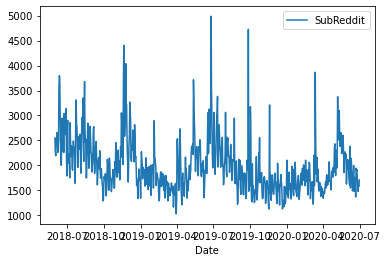

In [11]:
exchange_indexed = reddit_comments_clean.set_index('Exchange')
bit_plot = exchange_indexed.loc['Bitcoin'].groupby('Date').count().plot()

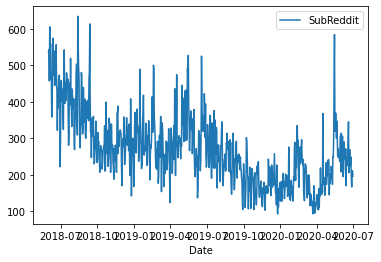

In [12]:
thereum_plot = exchange_indexed.loc['Ethereum'].groupby('Date').count().plot()

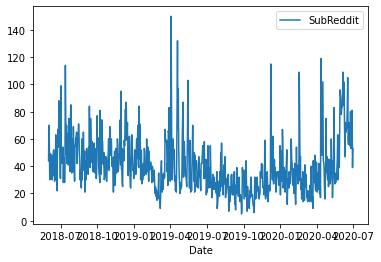

In [13]:
cardano_plot = exchange_indexed.loc['Cardano'].groupby('Date').count().plot()

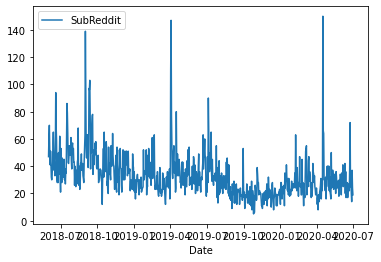

In [14]:
doge_plot = exchange_indexed.loc['Dogecoin'].groupby('Date').count().plot()

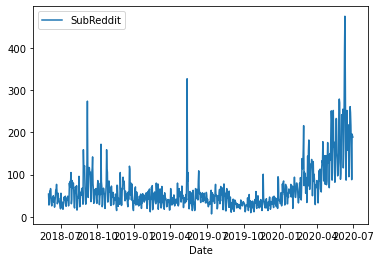

In [15]:
nasdaq_plot = exchange_indexed.loc['NASDAQ'].groupby('Date').count().plot()

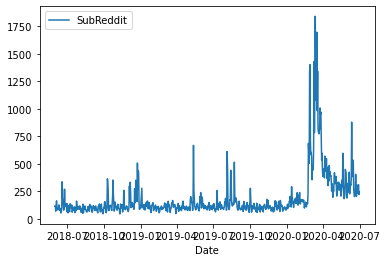

In [16]:
dow_plot = exchange_indexed.loc['Dow Jones'].groupby('Date').count().plot()

In [17]:
bit_subs = exchange_indexed.loc['Bitcoin'].groupby('SubReddit').count()
bit_subs

,Date
SubReddit,
01coin,1
0b0t,2
0chain,1
0xBitcoinCash,5
0xProject,63
...,...
zpool,2
zrxtrader,193
zurich,11


In [18]:
df = pd.DataFrame(reddit_comments_clean.groupby(['Exchange', 'Date']).count()).reset_index()
df

,Exchange,Date,SubReddit
0,Bitcoin,2018-06-01,2543
1,Bitcoin,2018-06-02,2286
2,Bitcoin,2018-06-03,2191
3,Bitcoin,2018-06-04,2548
4,Bitcoin,2018-06-05,2487
...,...,...,...
4561,NASDAQ,2020-06-26,161
4562,NASDAQ,2020-06-27,88
4563,NASDAQ,2020-06-28,196
4564,NASDAQ,2020-06-29,191


In [19]:
bitcoin_two_year = df.loc[df['Exchange']=='Bitcoin', :]
ethereum_two_year = df.loc[df['Exchange']=='Ethereum', :].set_index("Date")
cardano_two_year = df.loc[df['Exchange']=='Cardano', :].set_index("Date")
dogecoin_two_year = df.loc[df['Exchange']=='Dogecoin', :].set_index("Date")
nasdaq_two_year = df.loc[df['Exchange']=='NASDAQ', :].set_index("Date")
dow_two_year = df.loc[df['Exchange']=='Dow Jones', :].set_index("Date")

bitcoin_two_year

#.plot(figsize=(15,5),title = "Reddit Comments June 2018 to June 2020")

#reddit_comments_two_year.set_xlabel("Date",fontweight="bold")
#reddit_comments_two_year.set_ylabel("Number of Comments",fontweight="bold")

#save plot
#plt.savefig("output/june2018_thru_june202_reddit_comments_bitcoin.png")

#display
#reddit_comments_two_year
#plt.tight_layout()



,Exchange,Date,SubReddit
0,Bitcoin,2018-06-01,2543
1,Bitcoin,2018-06-02,2286
2,Bitcoin,2018-06-03,2191
3,Bitcoin,2018-06-04,2548
4,Bitcoin,2018-06-05,2487
...,...,...,...
756,Bitcoin,2020-06-26,1600
757,Bitcoin,2020-06-27,1479
758,Bitcoin,2020-06-28,1593
759,Bitcoin,2020-06-29,1581


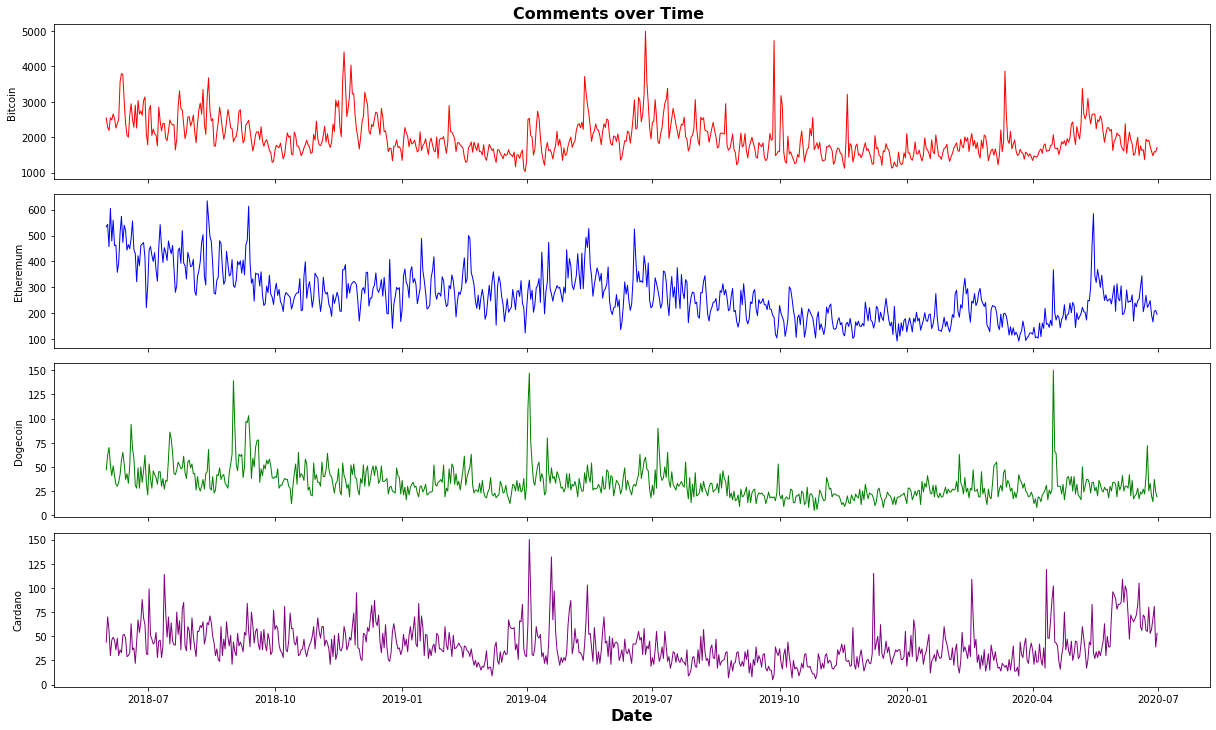

In [34]:
date_range = bitcoin_two_year["Date"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,figsize=(17,10))
fig.suptitle("Comments over Time", fontsize=16, fontweight="bold", y=1.01)

ax1.plot(date_range, bitcoin_two_year["SubReddit"], linewidth=1, color ="red")
ax1.set_ylabel(f"Bitcoin")

ax2.plot(date_range, ethereum_two_year["SubReddit"], linewidth=1, color ="blue")
ax2.set_ylabel(f"Etheremum")

ax3.plot(date_range, dogecoin_two_year["SubReddit"], linewidth=1,color ="green")
ax3.set_ylabel(f"Dogecoin")

ax4.plot(date_range, cardano_two_year["SubReddit"], linewidth=1, color ="purple")
ax4.set_ylabel(f"Cardano")
ax4.set_xlabel("Date",fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/comment_counts.png")

plt.tight_layout()
plt.show()

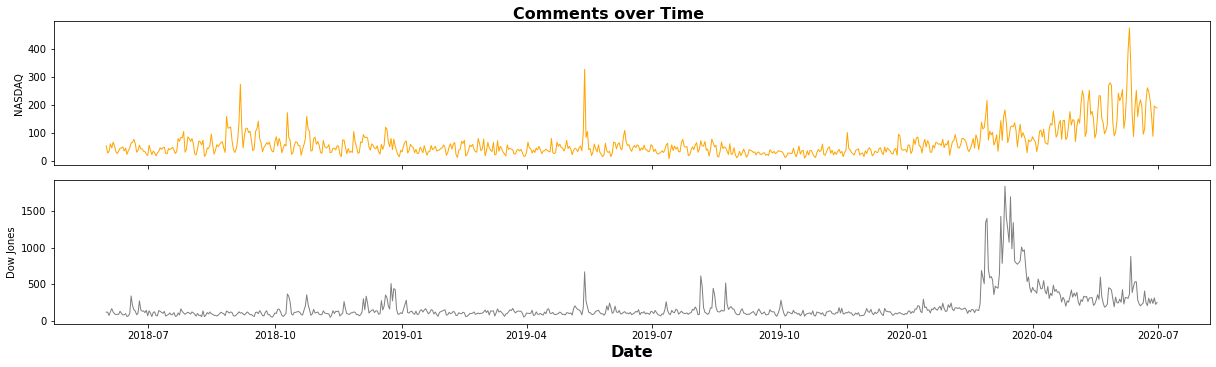

In [36]:
date_range = bitcoin_two_year["Date"]
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(17,5))
fig.suptitle("Comments over Time", fontsize=16, fontweight="bold", y=1.01)

ax1.plot(date_range, nasdaq_two_year["SubReddit"], linewidth=1, color ="orange")
ax1.set_ylabel(f"NASDAQ")

ax2.plot(date_range, dow_two_year["SubReddit"], linewidth=1, color ="gray")
ax2.set_ylabel(f"Dow Jones")
ax2.set_xlabel("Date",fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/comment_counts_stocks.png")

plt.tight_layout()
plt.show()

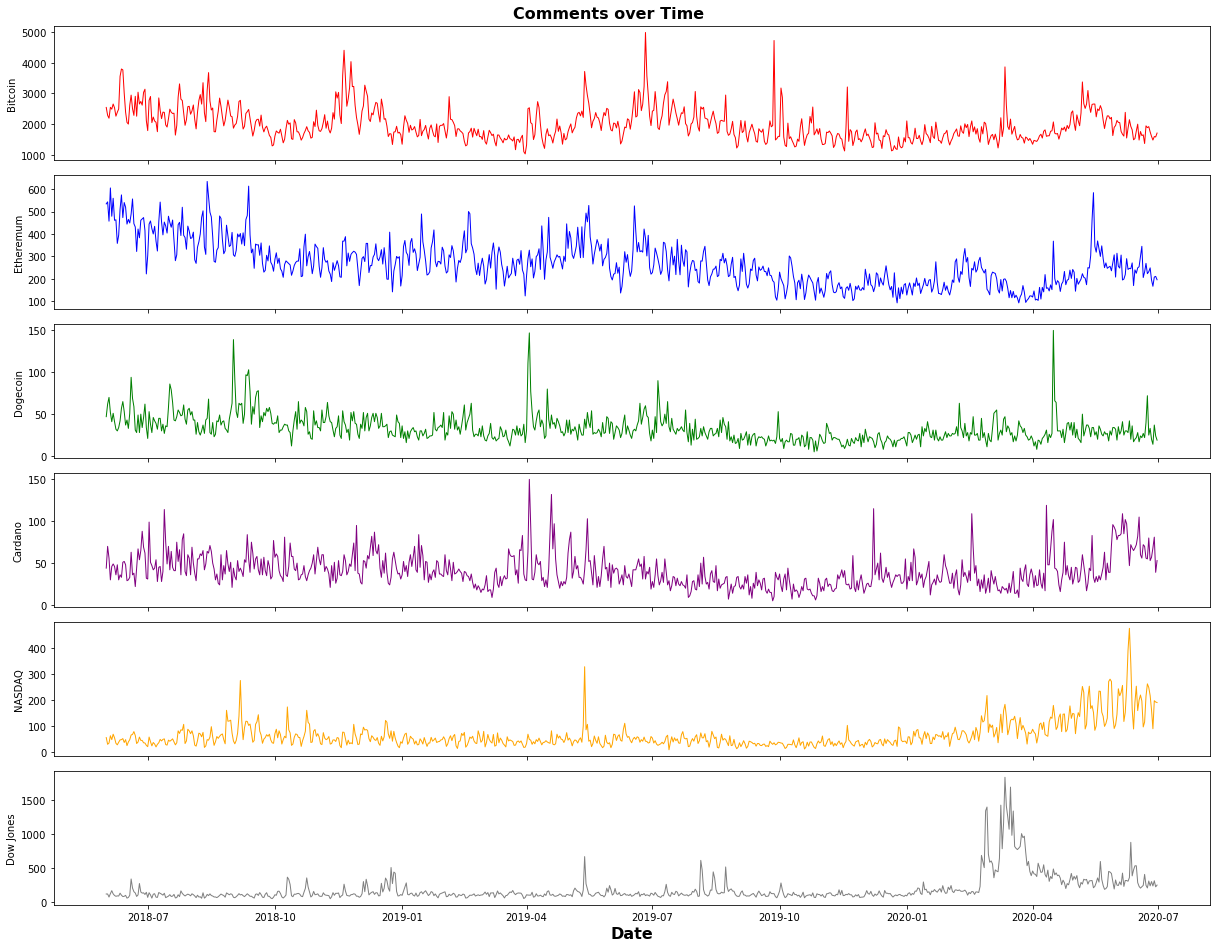

In [32]:
date_range = bitcoin_two_year["Date"]
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True,figsize=(17,13))
fig.suptitle("Comments over Time", fontsize=16, fontweight="bold", y= 1.01)

ax1.plot(date_range, bitcoin_two_year["SubReddit"], linewidth=1, color ="red")
ax1.set_ylabel(f"Bitcoin")

ax2.plot(date_range, ethereum_two_year["SubReddit"], linewidth=1, color ="blue")
ax2.set_ylabel(f"Etheremum")

ax3.plot(date_range, dogecoin_two_year["SubReddit"], linewidth=1,color ="green")
ax3.set_ylabel(f"Dogecoin")

ax4.plot(date_range, cardano_two_year["SubReddit"], linewidth=1, color ="purple")
ax4.set_ylabel(f"Cardano")

ax5.plot(date_range, nasdaq_two_year["SubReddit"], linewidth=1, color ="orange")
ax5.set_ylabel(f"NASDAQ")

ax6.plot(date_range, dow_two_year["SubReddit"], linewidth=1, color ="gray")
ax6.set_ylabel(f"Dow Jones")
ax6.set_xlabel("Date",fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/comment_counts_all.png")

plt.tight_layout()
plt.show()